In [1]:
from no_box_attack import *
from models.generators import MnistGenerator, MnistGeneratorClamp
from utils.utils import create_loaders, display_tensor
import matplotlib.pyplot as plt
from pathlib import Path
from cnn_models.mnist_ensemble_adv_train_models import *
import os

/Users/jamestjw/miniconda3/envs/NoBox/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/jamestjw/miniconda3/envs/NoBox/lib/python3.7/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [2]:
image_out_path = Path('eval_images')
if not os.path.exists(image_out_path): os.mkdir(image_out_path)

In [3]:
checkpoint = torch.load("./saved_models/modelA-normal-gen.pt", map_location=torch.device('cpu'))
checkpoint = checkpoint["model"]

modelAGen = MnistGenerator()
modelAGen.load_state_dict(checkpoint)
modelAGen.eval();


checkpoint = torch.load("./saved_models/modelA-clamp-gen.pt", map_location=torch.device('cpu'))
checkpoint = checkpoint["model"]
modelAClampGen = MnistGeneratorClamp()
modelAClampGen.load_state_dict(checkpoint)
modelAClampGen.eval();

In [4]:
pretrained_path = Path("../pretrained_classifiers/mnist/ensemble_adv_trained/")
names = ["modelA.pt", "modelA_adv.pt", "modelA_ens.pt"]

def load_model(name):
    m = modelA()
    checkpoint = torch.load(pretrained_path/name, map_location=torch.device('cpu'))
    m.load_state_dict(checkpoint)
    return m

modelA, modelA_adv, modelA_ens = [load_model(name) for name in names]

In [5]:
# Load data
class Args: pass
args = Args()
args.dataset = "mnist"
args.batch_size = 8
args.epsilon = 0.3

_, test_loader, _, _ = create_loaders(args)

==> Preparing data..


In [105]:
xs, ys = next(iter(test_loader))
adv_xs, _ = modelAGen(xs, torch.tensor([args.epsilon]), target=ys)
adv_xs = adv_xs.detach()
A_preds = modelA(adv_xs).argmax(1).detach()
A_adv_preds = modelA_adv(adv_xs).argmax(1).detach()
A_ens_preds = modelA_ens(adv_xs).argmax(1).detach()

In [106]:
# def imshow(inp, title, filename=None):
#     fig, ax = plt.subplots()
#     fig.patch.set_visible(False)
#     ax.axis('off')
#     inp = inp.numpy()[0]
#     plt.imshow(inp, cmap='gray')
#     ax.set_title(title, wrap=True)
#     if filename: plt.savefig(filename)

In [107]:
# out_dir = image_out_path/'modelA-normal-gen'
# if not out_dir.exists(): out_dir.mkdir()

# for i, (im, y, A_pred, A_adv_pred, A_ens_pred) in enumerate(zip(adv_xs, ys, A_preds, A_adv_preds, A_ens_preds)):
#     title = f'Target :{y}    A: {A_pred}   A_adv: {A_adv_pred}   A_ens: {A_ens_pred}'
#     imshow(im, title, out_dir/f'{i}.png')

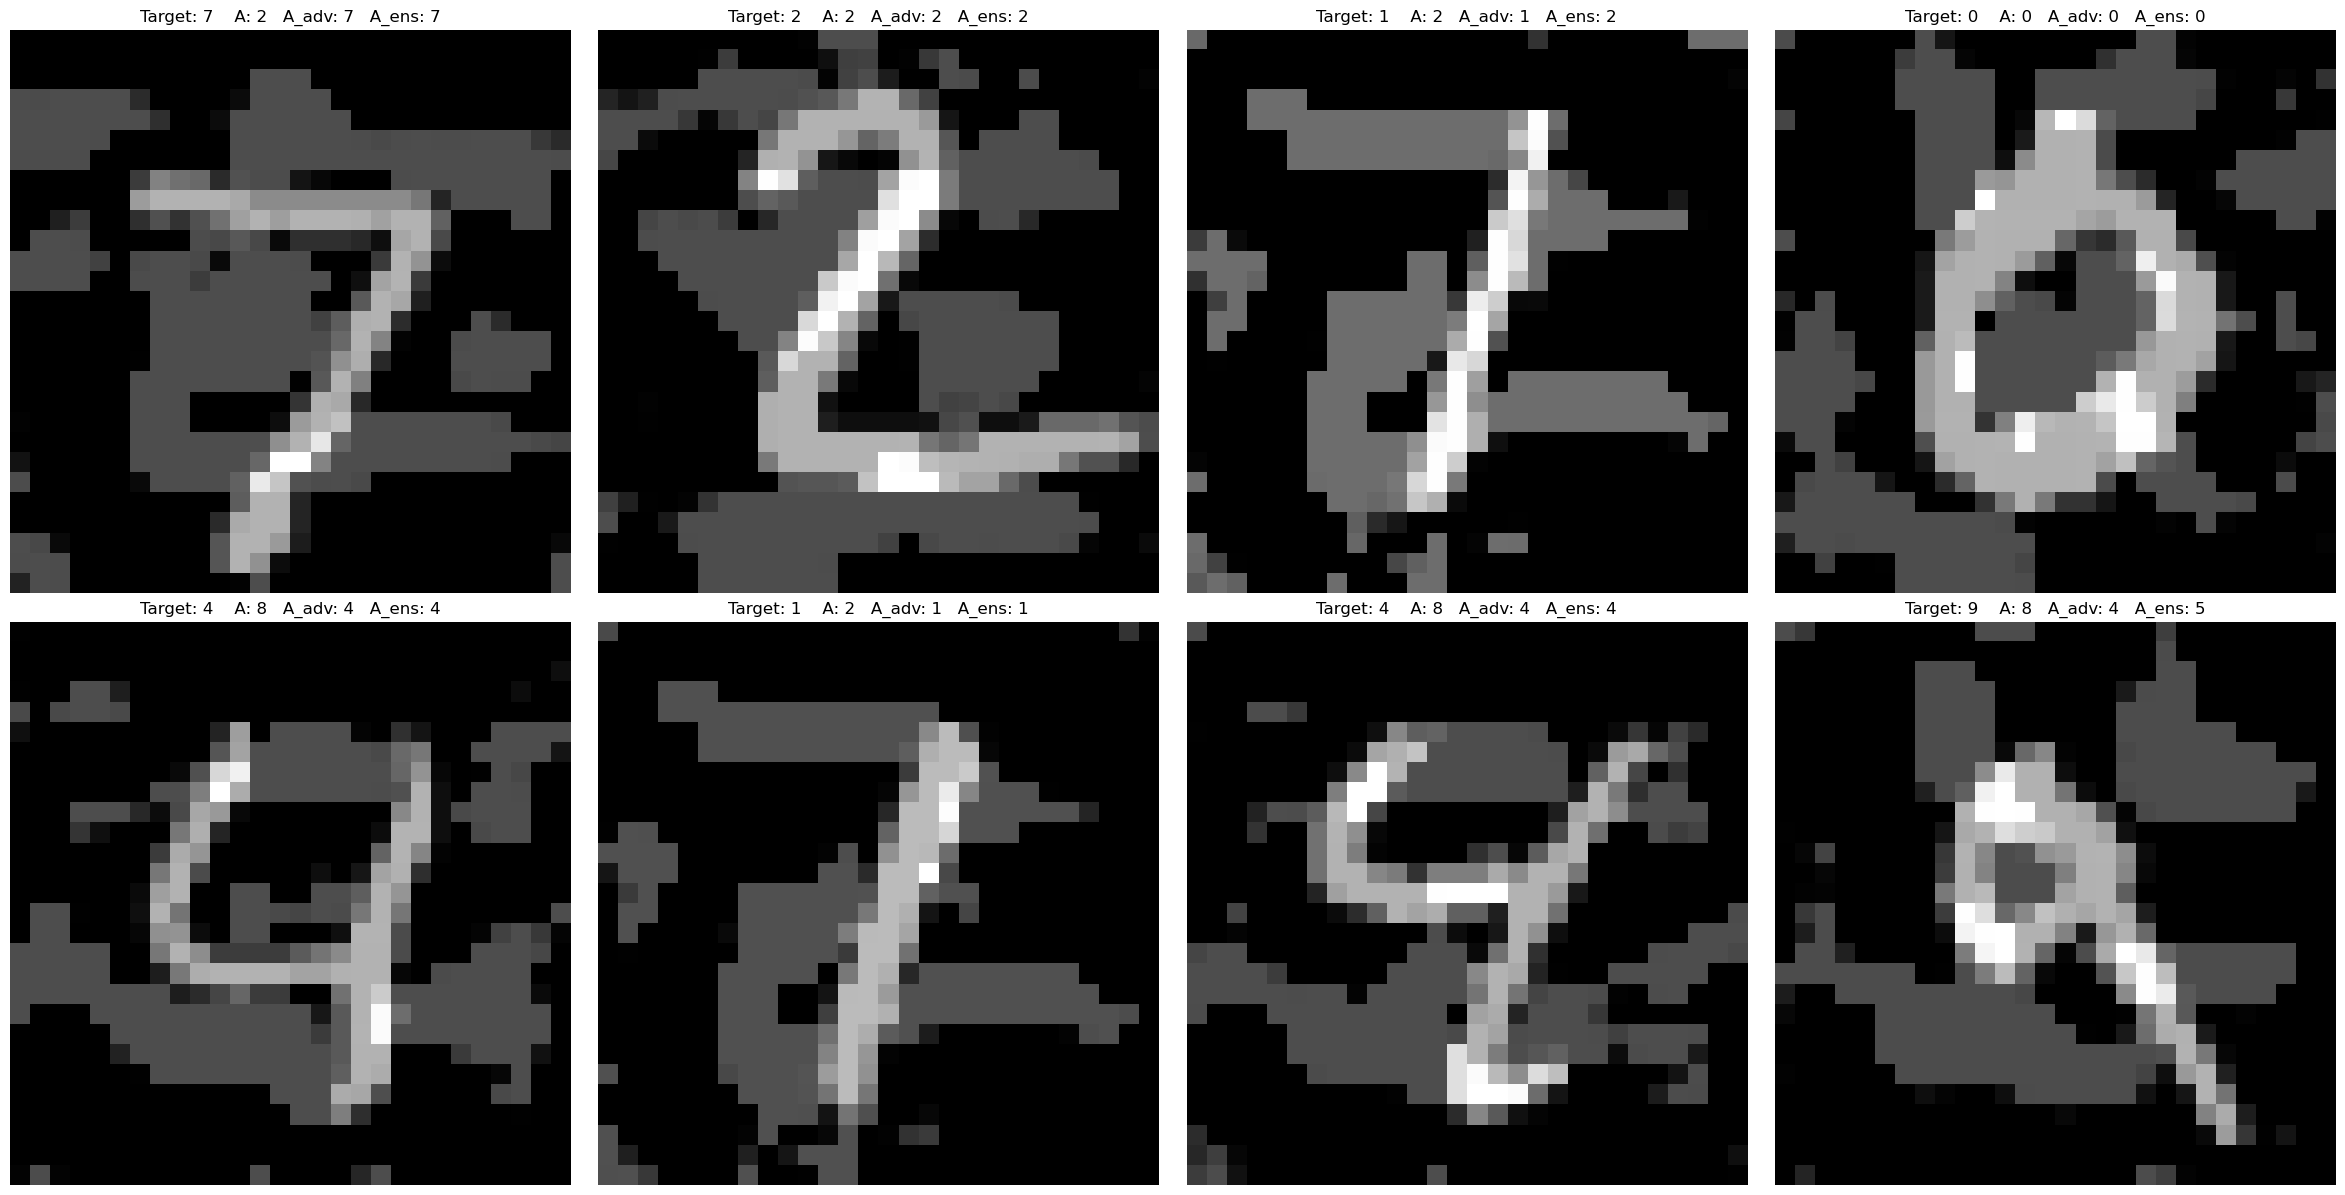

In [114]:
max_rows = 2
max_cols = 4

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(30,15))


for idx, (im, y, A_pred, A_adv_pred, A_ens_pred) in enumerate(zip(adv_xs, ys, A_preds, A_adv_preds, A_ens_preds)):
    title = f'Target: {y}    A: {A_pred}   A_adv: {A_adv_pred}   A_ens: {A_ens_pred}'
    row = idx // max_cols
    col = idx % max_cols

    axes[row, col].axis("off")
    axes[row, col].set_title(title, wrap=True)
    axes[row, col].imshow(im.numpy()[0], cmap="gray", aspect="auto")
plt.subplots_adjust(wspace=.05, hspace=.05)
plt.margins(x=0)
plt.show()

out_dir = image_out_path/'modelA-normal-gen'
if not out_dir.exists(): out_dir.mkdir(parents=True)
fig.savefig(out_dir/'sample-modelA-normalgen.png',bbox_inches='tight')

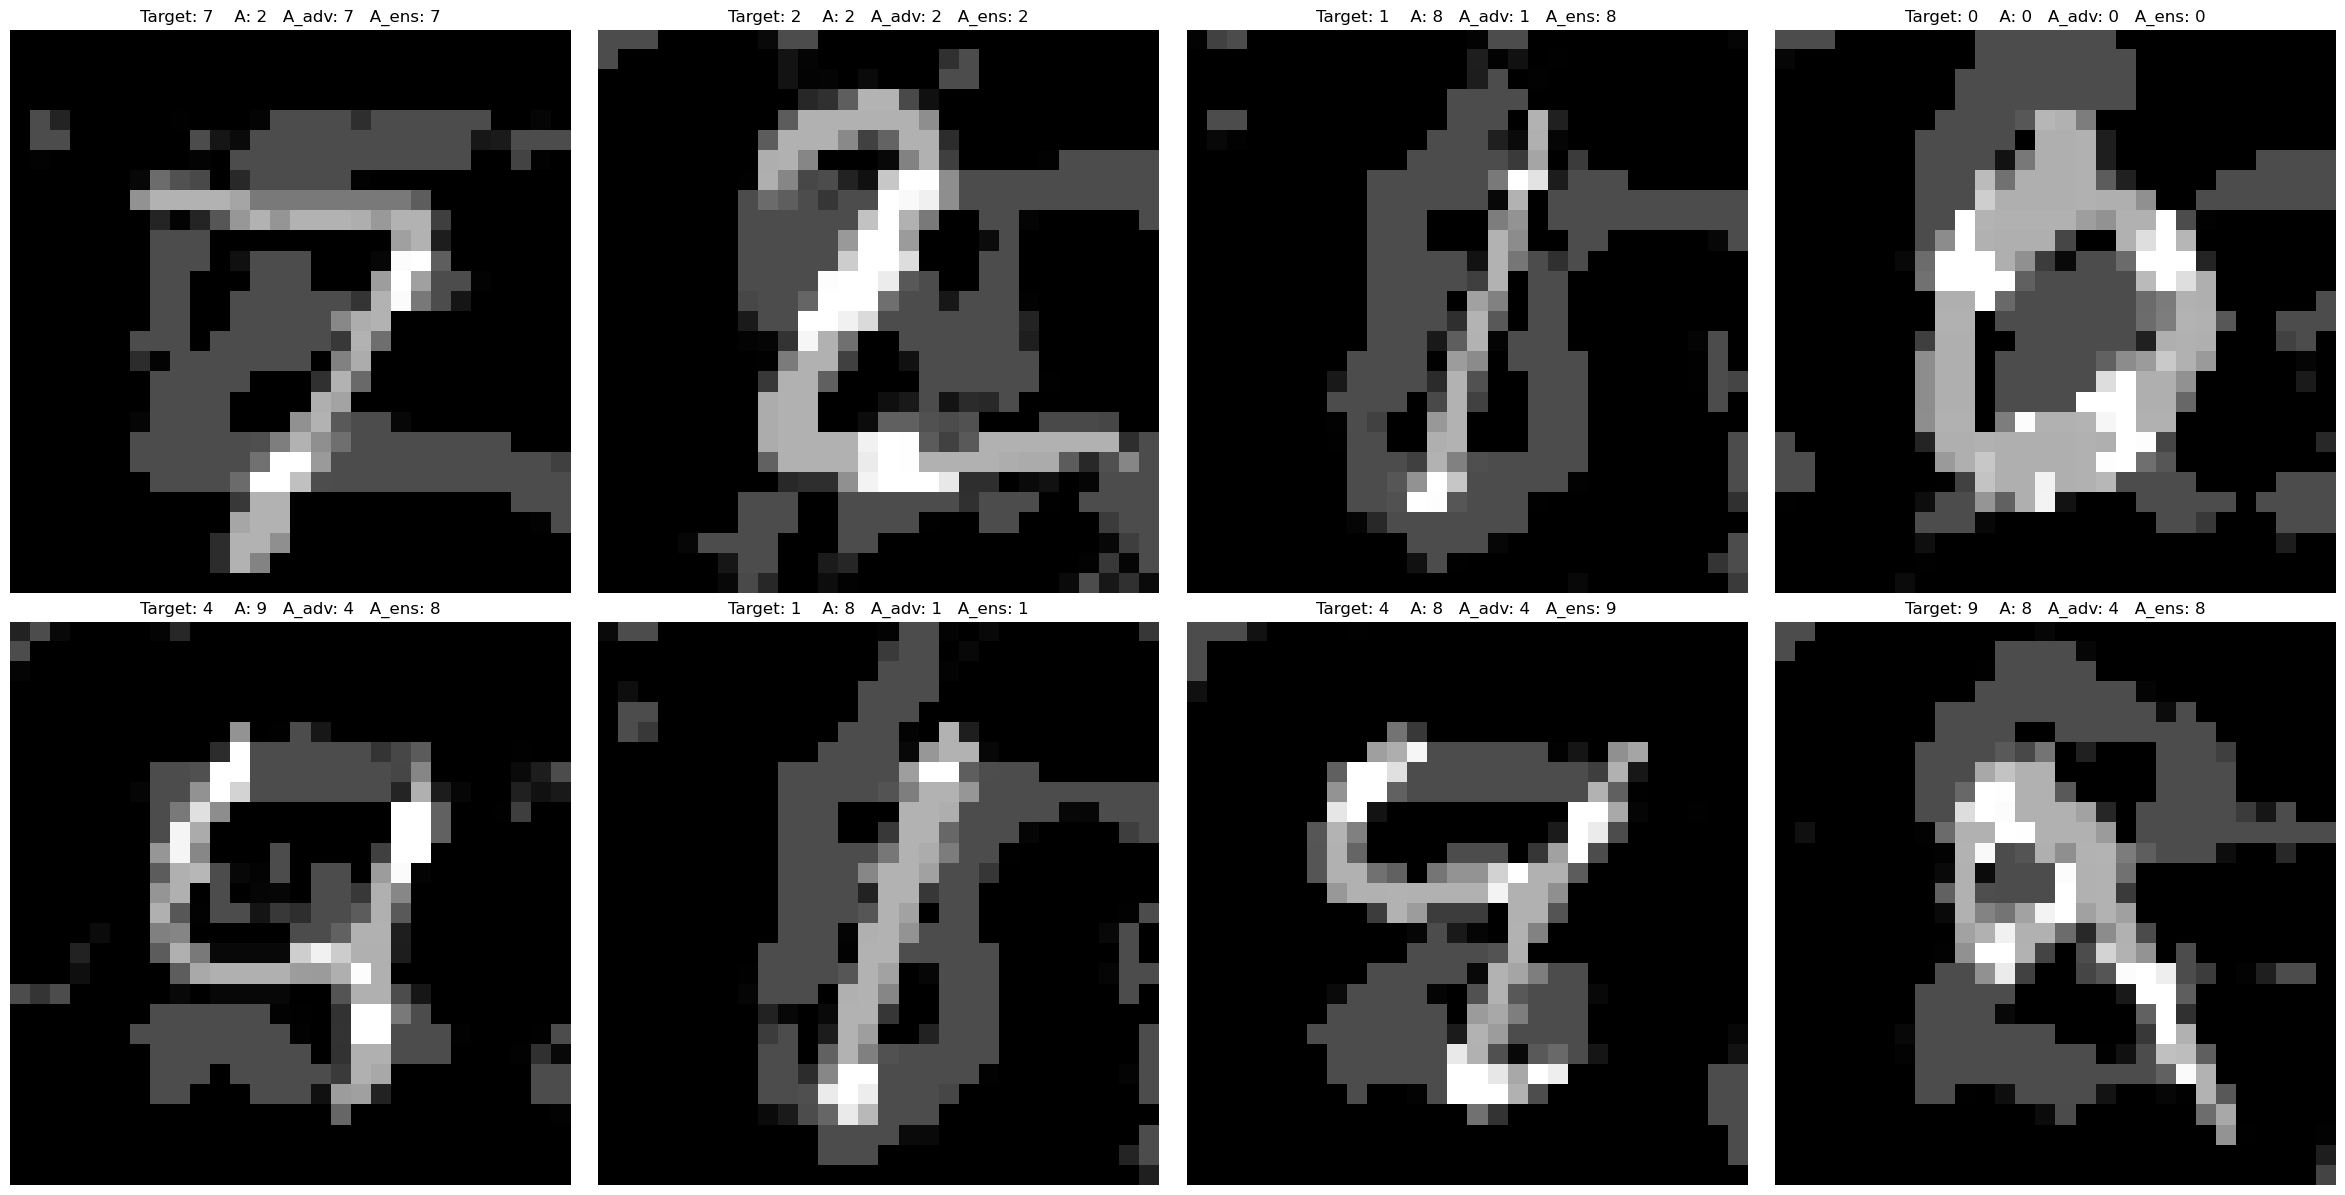

In [6]:
xs, ys = next(iter(test_loader))
adv_xs, _ = modelAClampGen(xs, torch.tensor([args.epsilon]), target=ys)
adv_xs = adv_xs.detach()
A_preds = modelA(adv_xs).argmax(1).detach()
A_adv_preds = modelA_adv(adv_xs).argmax(1).detach()
A_ens_preds = modelA_ens(adv_xs).argmax(1).detach()

max_rows = 2
max_cols = 4

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(30,15))


for idx, (im, y, A_pred, A_adv_pred, A_ens_pred) in enumerate(zip(adv_xs, ys, A_preds, A_adv_preds, A_ens_preds)):
    title = f'Target: {y}    A: {A_pred}   A_adv: {A_adv_pred}   A_ens: {A_ens_pred}'
    row = idx // max_cols
    col = idx % max_cols

    axes[row, col].axis("off")
    axes[row, col].set_title(title, wrap=True)
    axes[row, col].imshow(im.numpy()[0], cmap="gray", aspect="auto")
plt.subplots_adjust(wspace=.05, hspace=.05)
plt.margins(x=0)
plt.show()

out_dir = image_out_path/'modelA-normal-gen'
if not out_dir.exists(): out_dir.mkdir(parents=True)
fig.savefig(out_dir/'sample-modelA-clampgen.png',bbox_inches='tight')